## 1- Loading the data and exploiting its fields

This first notebook shows how to load the corresponding dataset found at [this link] and how to manipulate the different fields. The data comes from $512^3$ homogeneous isotropic turbulence simulation, containing filtered input parameters and output sub-grid scalar closure term for the DNS, dynamic Smagorinsky (DynSmag) and dynamic Regularized Gradient (DynRG).

In [1]:
import sys

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

sys.path.append('../src')

from dataset import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cuda



### Import data from established turbulence

As said in the referring paper, the considered flow is in developed turbulence at iteration $S = 20000$ and since there are $500$ iterations separating each samples, we select ``established=40`` samples filtered at $\Delta = 8$ (which comes down to a size of $512^3/\Delta = 64$).

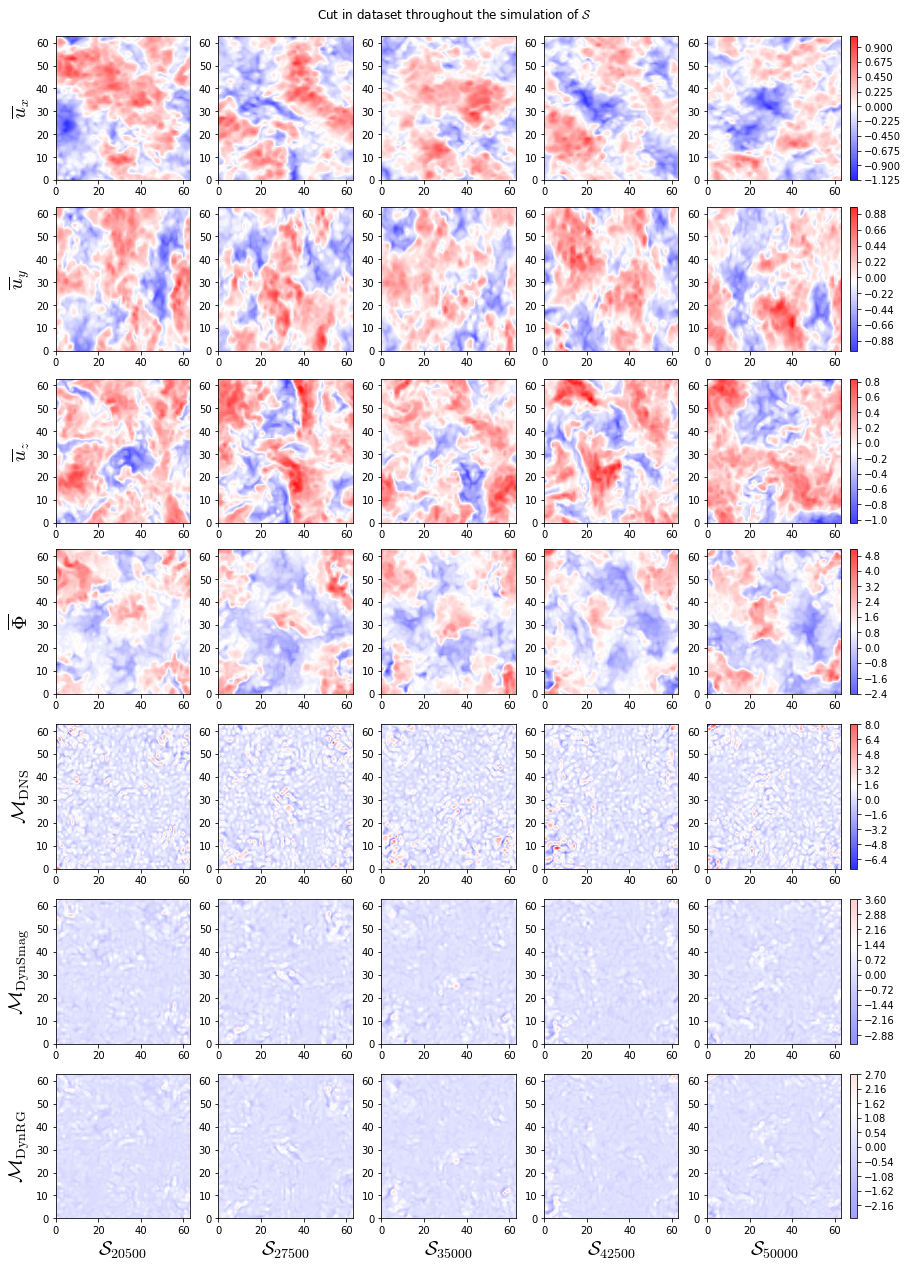

In [3]:
data_path = '../data/subgrid-scalar-dataset/'

dataset = SubgridDataset(
    device=device,
    path=data_path + 'train/08/', 
    samples=100,
    established=40,
    size=64,
    x=['velocity_field_x_nd_08', 'velocity_field_y_nd_08', 'velocity_field_z_nd_08', 'scalar_field_nd_08'],
    y=['sgs_flux_div_dns_nd_08', 
       'sgs_flux_div_dynsmag_nd_08', 
       'sgs_flux_div_dynrg_nd_08'
      ]
)

# plot the data
dataset.plot(slice=32, ylabels=[
    r'$\overline{u}_{x}$', 
    r'$\overline{u}_{y}$', 
    r'$\overline{u}_{z}$', 
    r'$\overline{\Phi}$', 
    
    r'$\mathcal{M}_{\mathrm{DNS}}$',
    r'$\mathcal{M}_{\mathrm{DynSmag}}$',
    r'$\mathcal{M}_{\mathrm{DynRG}}$',
])


### Data can be directly accessed from the input and label fields. 

We can compute the mean squared error (MSE) between the DNS and the algebraic models for example:

In [4]:
mse_dynsmag = ((dataset.labels[:, 0] - dataset.labels[:, 1])**2).mean()
mse_dynrg   = ((dataset.labels[:, 0] - dataset.labels[:, 2])**2).mean()

print('MSE DynSmag :', mse_dynsmag.item())
print('MSE DynRG   :', mse_dynrg.item())

MSE DynSmag : 1.8470325469970703
MSE DynRG   : 1.5971239805221558


## Loading different filter size data

The filter size used for the data is indicated by ``nd_N`` in the file name where $N$ is the filter width. Lets load input data and DNS closure term with $\Delta = 32$ in the transitional regime (from sample 1 to 30).

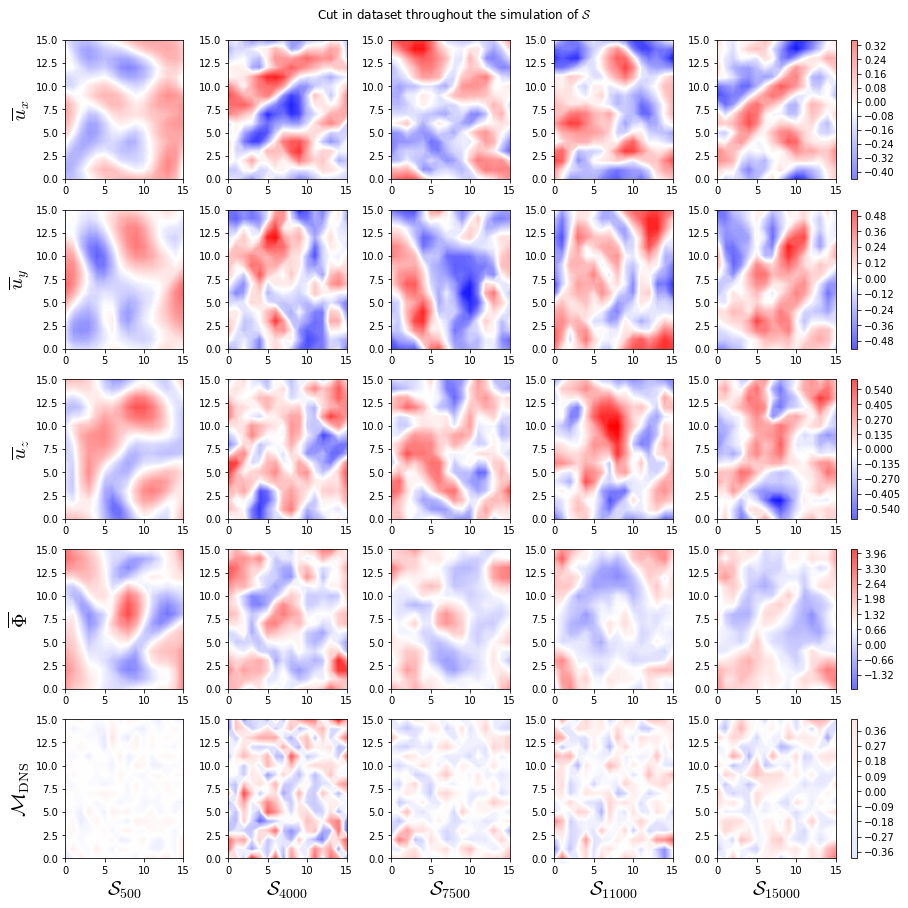

In [5]:
dataset_32 = SubgridDataset(
    device=device,
    path=data_path + 'train/32/',
    samples=30,
    established=0,
    size=16,
    x=['velocity_field_x_nd_32', 'velocity_field_y_nd_32', 'velocity_field_z_nd_32', 'scalar_field_nd_32'],
    y=['sgs_flux_div_dns_nd_32']
)

# plot the data
dataset_32.plot(slice=8, ylabels=[
    r'$\overline{u}_{x}$', 
    r'$\overline{u}_{y}$', 
    r'$\overline{u}_{z}$', 
    r'$\overline{\Phi}$', 
    
    r'$\mathcal{M}_{\mathrm{DNS}}$',
])